<a href="https://colab.research.google.com/github/shubov/ai-cup/blob/lstm/AI_CUP_first_try.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Energy forecasting (Task 1)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

## Task

This data science challenge task entails estimating energy use forecasts for upto a week, for groups of households in the UK energy market, selected based on geographical similarity. The challenge has two sub-tasks:

*   The first sub-task, only one value for the single day ahead is required to be estimated. In other words the aggregated use for one day (1 value per day).
*   In the second sub-task, the demand for each hour in the day-ahead is to be estimated (24 values per day).

You are provided with historical half-hourly energy readings for the 61 anonymised groups between 1 January 2017 and 04 September 2019. A week is sliced off from each 45-day window and reserved for testing the models. You are required to estimate these missing periods in the two frequencies.

Every group consists of a different number of dwellings, for which energy consumption profile has been summed up for two reasons: data privacy and forecasting accuracy.

In [ ]:
df=pd.read_csv('/content/train.csv')

## Data Analysis

In [ ]:
df.head()

,pseudo_id,2017-01-01 00:00:00,2017-01-01 00:30:00,2017-01-01 01:00:00,2017-01-01 01:30:00,2017-01-01 02:00:00,2017-01-01 02:30:00,2017-01-01 03:00:00,2017-01-01 03:30:00,2017-01-01 04:00:00,...,2019-08-28 19:00:00,2019-08-28 19:30:00,2019-08-28 20:00:00,2019-08-28 20:30:00,2019-08-28 21:00:00,2019-08-28 21:30:00,2019-08-28 22:00:00,2019-08-28 22:30:00,2019-08-28 23:00:00,2019-08-28 23:30:00
0,0x16cb02173ebf3059efdc97fd1819f14a2,45.023,39.9850,36.5695,34.7480,35.972,38.439,36.591,36.3155,32.6605,...,24.2880,23.994,26.1995,25.0270,23.0665,26.093,23.4295,25.4715,26.246,22.6020
1,0x1c9d08cd16fce04790ef900695861e786,2.931,1.6410,2.2600,2.2730,2.651,3.137,2.532,3.1420,2.5280,...,2.5700,1.446,1.5230,1.5630,2.5880,2.190,1.4860,2.5270,2.288,1.7940
2,0x1612e4cbe3b1b85c3dbcaeaa504ee8424,11.014,12.6525,10.8240,13.7485,12.383,12.342,13.413,11.4840,11.5105,...,6.3565,5.766,5.4955,5.0885,6.8140,7.492,5.7705,6.8240,6.072,6.7205
3,0x20158d36236a640cf0524dba149459169,55.813,49.0400,49.0950,41.1330,45.660,48.477,50.539,45.7370,42.6800,...,32.6460,30.439,30.2470,31.2660,34.3390,33.076,33.1080,33.7260,30.009,34.8400
4,0xc305005dcb1ed6128d816954c5ab9e7e,26.925,28.1180,25.6000,28.0910,26.530,23.858,26.556,27.7140,23.1740,...,13.3980,13.280,13.7340,13.6060,14.7000,16.290,15.1240,15.3650,14.360,13.9350


In [ ]:
df_first=df.copy()

In [ ]:
df_ = df_first.drop(columns='pseudo_id')
# convert dates to pandas datetime
df_.columns = [datetime.strptime(c, "%Y-%m-%d %H:%M:%S") for c in df_.columns]
# Aggregate energy use values per day
df_ = df_.T.groupby(df_.T.index.date).sum()

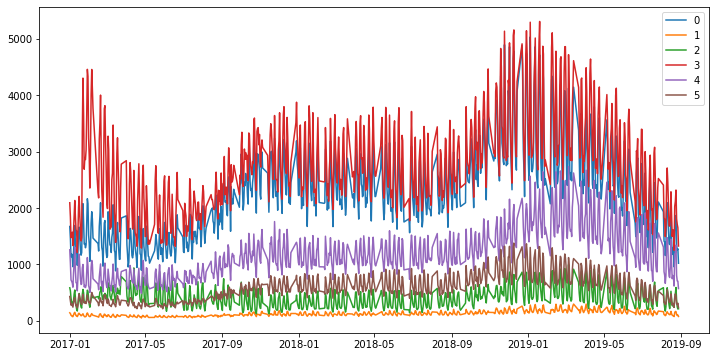

In [ ]:
df_.loc[: , 0: 5].plot(figsize=(12,6))

#### 2017

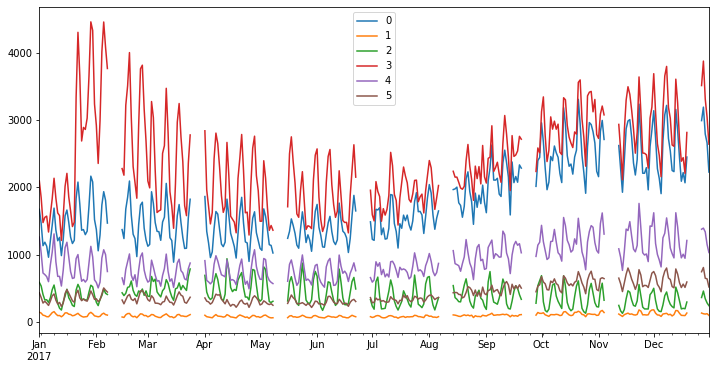

In [ ]:
new_date_range = pd.date_range(start="2017-01-01", end="2017-12-31", freq="D")
df_year_17 = df_.reindex(new_date_range)
df_year_17.loc[: , 0: 5].plot(figsize=(12,6))

#### 2018

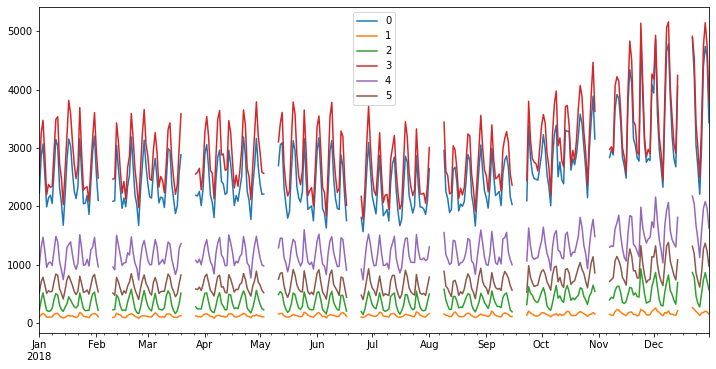

In [ ]:
new_date_range = pd.date_range(start="2018-01-01", end="2018-12-31", freq="D")
df_year_18 = df_.reindex(new_date_range)
df_year_18.loc[: , 0: 5].plot(figsize=(12,6))

#### 2019

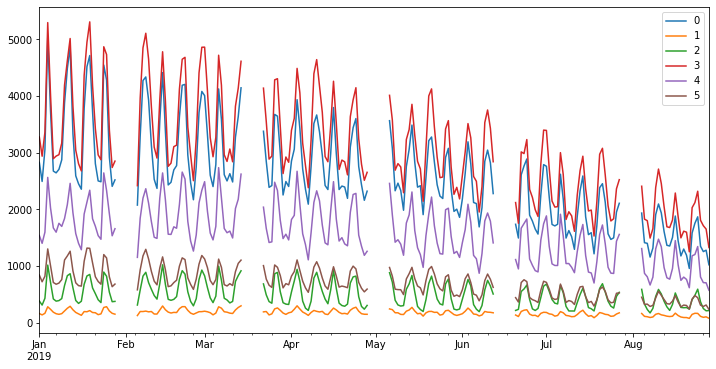

In [ ]:
new_date_range = pd.date_range(start="2019-01-01", end="2019-08-28", freq="D")
df_year_19 = df_.reindex(new_date_range)
df_year_19.loc[: , 0: 5].plot(figsize=(12,6))

In [ ]:
df_.index = pd.to_datetime(df_.index)#почему-то слетел формат, почему?

### Weak resampling

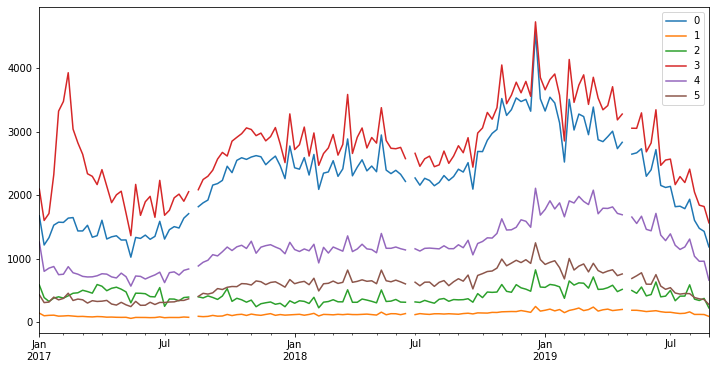

In [ ]:
df_weak=df_.resample("W").mean()
df_weak.loc[: , 0: 5].plot(figsize=(12,6))

#### Month resampling

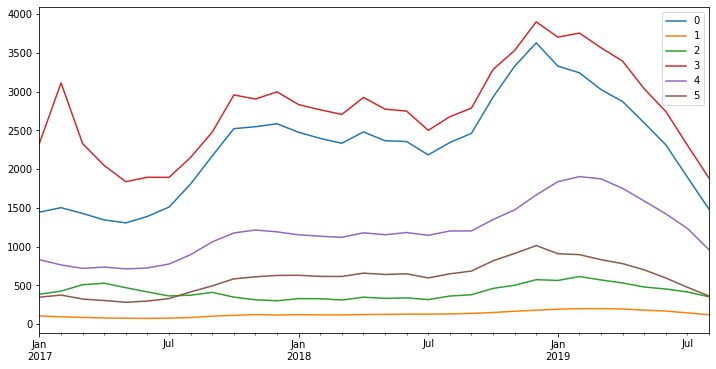

In [ ]:
df_month=df_.resample("M").mean()
df_month.loc[: , 0: 5].plot(figsize=(12,6))

## Dummy model

In [ ]:
dummy_test=df_.reindex(pd.date_range(start='2017-01-01', end='2019-08-28')) #не работает ffill без этого костеля, почему

In [ ]:
dummy_test_filled=dummy_test.ffill()

In [ ]:
dummy_test_filled.reindex(pd.date_range(start='2017-02-01', end='2017-02-16')) ##check

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
2017-02-01,1372.3825,82.680,290.5195,2919.566,584.828,342.542,130.007,757.0935,987.1455,258.706,...,7.621,654.617,117.246,30.461,412.206,17.715,60.318,102.0545,73.2150,61.089
2017-02-02,1056.1095,75.174,241.4940,2355.022,504.496,301.497,94.706,599.2770,847.9830,228.451,...,2.387,551.819,95.263,25.800,317.178,12.516,45.359,86.9830,55.7830,49.181
2017-02-03,1290.8265,81.824,334.4945,2990.302,590.362,325.613,100.720,943.5215,977.8870,244.336,...,9.209,640.789,170.493,27.610,354.667,15.149,45.105,83.0470,65.8380,62.984
2017-02-04,1737.6175,113.631,390.1805,4014.421,948.210,414.804,124.748,1480.8530,1193.0785,291.966,...,15.803,771.764,317.699,30.344,600.916,22.640,54.483,124.7990,41.0290,78.558
2017-02-05,1935.3125,128.987,490.0385,4458.047,1071.587,504.192,136.127,1775.9900,1379.6615,338.125,...,15.969,832.534,358.352,29.124,662.537,31.045,60.591,154.6210,45.3185,86.860
2017-02-06,1807.4465,107.259,424.5275,4083.174,1000.546,470.448,122.035,1714.1430,1285.8580,317.283,...,20.407,734.679,347.949,31.251,578.147,22.573,55.662,134.6930,37.4015,80.946
2017-02-07,1468.2410,100.169,407.2335,3766.706,748.208,443.048,118.027,1515.4705,1189.9680,303.120,...,15.344,722.430,314.118,26.295,446.487,22.880,48.881,119.6860,52.2930,83.260
2017-02-08,1468.2410,100.169,407.2335,3766.706,748.208,443.048,118.027,1515.4705,1189.9680,303.120,...,15.344,722.430,314.118,26.295,446.487,22.880,48.881,119.6860,52.2930,83.260
2017-02-09,1468.2410,100.169,407.2335,3766.706,748.208,443.048,118.027,1515.4705,1189.9680,303.120,...,15.344,722.430,314.118,26.295,446.487,22.880,48.881,119.6860,52.2930,83.260
2017-02-10,1468.2410,100.169,407.2335,3766.706,748.208,443.048,118.027,1515.4705,1189.9680,303.120,...,15.344,722.430,314.118,26.295,446.487,22.880,48.881,119.6860,52.2930,83.260


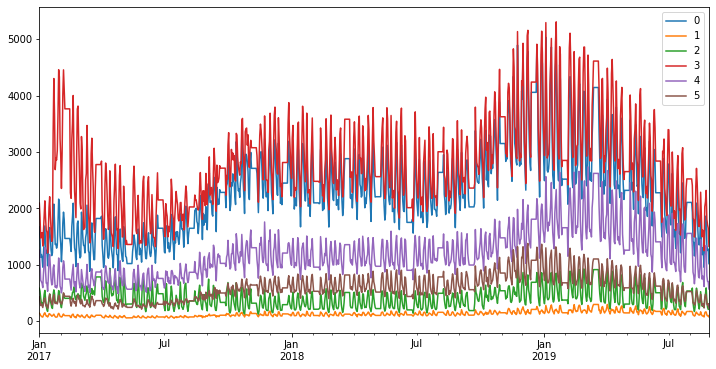

In [ ]:
dummy_test_filled.loc[: , 0: 5].plot(figsize=(12,6))

In [ ]:
#первоначальный: трэин, тест.
#трэин: трэйн, вал
train_window=38# train, validation 
test_window=7

In [ ]:
dates=dummy_test_filled.index
start_date, end_date = dates.min(), dates.max()
date_range = pd.date_range(start_date, end_date)
n_dates = len(date_range)

In [ ]:
indices = np.arange(n_dates)
train_starts = range(0, n_dates, train_window+test_window)

In [ ]:
def split(X, y, dates):
  start_date, end_date = dates.min(), dates.max()
  date_range = pd.date_range(start_date, end_date)
  n_dates = len(date_range)
  indices = np.arange(n_dates)
  train_starts = range(0, n_dates, train_window+test_window)
  for train_start in train_starts:
    #print(train_start)
    avail_days = min(n_dates - train_start, train_window + test_window)#????????? 
    #print(avail_days)
    test_start = max(train_start, train_start + avail_days - test_window)
    #print(test_start)
    train_dates = date_range[indices[train_start: test_start]]
    test_dates = date_range[test_start: train_start + avail_days]
    train_indices = np.where(np.isin(dates, train_dates))[0]
    test_indices = np.where(np.isin(dates, test_dates))[0]
    if len(test_dates) < test_window:
      continue
    yield list(train_indices), list(test_indices)


In [ ]:
df_x=pd.DataFrame()
for train_ind, test_ind in split(dummy_test_filled, y=dummy_test_filled, dates = dummy_test_filled.index):
  X_train = dummy_test_filled.iloc[train_ind]
  y_train = dummy_test_filled.iloc[train_ind].shift(1)#берем значения предыдущего
  X_test=dummy_test_filled.iloc[test_ind]
  df_x=df_x.append(X_test)


In [ ]:
df_x=df_x.T

In [ ]:
sub=pd.read_csv('sample_submission_daily.csv')

FileNotFoundError: ignored

In [ ]:
df_x['pseudo_id']=sub['pseudo_id']

In [ ]:
df_x

## Evaluation


The evaluation metric for this competition is Mean Absolute Percentage Error, computed as:

$\text{MAPE} = \frac{1}{T*G} \sum_{g} (\sum_{t} |\frac{a_{t,g}-f_{t,g}}{a_{t,g}}|)  \times 100$ where,

$T$: number of timesteps (days for sub-task 1 and hours for sub-task 2)</br>
$G$: number of groups (days for sub-task 1 and hours for sub-task 2)</br>
$a_{i,j}$: actual value for time point t of group g </br>
$f_{i,j}$: forecasted value for time point t of group g</br>

We will weight the MAPE for both sub-tasks equally. MAPE averaged over all the timesteps over all the days will be the final score.

In [ ]:
def evaluate(y, yhat, perc=True):
    """Method to evaluate MAPE"""

    y = y.drop('pseudo_id', axis = 1).values
    yhat = yhat.drop('pseudo_id', axis = 1).values

    assert y.shape == yhat.shape
    n = len(yhat.index) if type(yhat) == pd.Series else len(yhat)
    for i in range(n):
        error = []
        for a, f in zip(y[i], yhat[i]):
            # avoid division by 0
            if a > 0:
                error.append(np.abs((a - f)/(a)))
        mape = np.mean(np.array(error))
    return mape * 100. if perc else mape

In [ ]:
evaluate(sub, df_x) #dummy result

## LSTM implementation


In [ ]:
from dataset import Dataset #using custom dataset loader

In [ ]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
from models_1 import LSTM, train_model #simple PyTorch LSTM model, see models.py


In [ ]:
dataset = Dataset('train.csv', frequency= "D", window_size= 7)

In [ ]:
dataset

In [ ]:
# Some hyperparameters
params = {
    'batch_size' : 256,
    'lr' : 0.001,
    'num_epochs' : 20

    }

input_dim = dataset[0][0].size(1)

# Define dataloader
data = DataLoader(dataset, batch_size=params['batch_size'], shuffle=False, sampler=None, batch_sampler=None, num_workers=0,
                  collate_fn=None, pin_memory=True, drop_last=False)


In [ ]:
data

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
# init model
model = LSTM(input_dim)

# Run training
train_model(model, data, device, **params)

LSTM(
  (lstm1): LSTMCell(1, 14)
  (lstm2): LSTMCell(14, 14)
  (linear): Linear(in_features=14, out_features=1, bias=True)
)


NameError: ignored